#Using Sonar Data and Machine Learning to Predict Whether an Object is a Rock or a Mine

Download Dataset:

In [ ]:
# install data tools
!pip install opendatasets
import opendatasets as od
import pandas as pd

# when prompted, use the following kaggle username and key to complete the data installation:
  # username: joekstriii
  # key: 3e85c504283b75261e8f7df89cf394e3

# download the data set to the local file system
od.download("https://www.kaggle.com/datasets/armanakbari/connectionist-bench-sonar-mines-vs-rocks/data")

# read the data set using pandas
data = pd.read_csv('/content/connectionist-bench-sonar-mines-vs-rocks/sonar.all-data.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joekstriii
Your Kaggle Key: ··········


100%|██████████| 28.6k/28.6k [00:00<00:00, 4.08MB/s]

#Initial Data Visualization


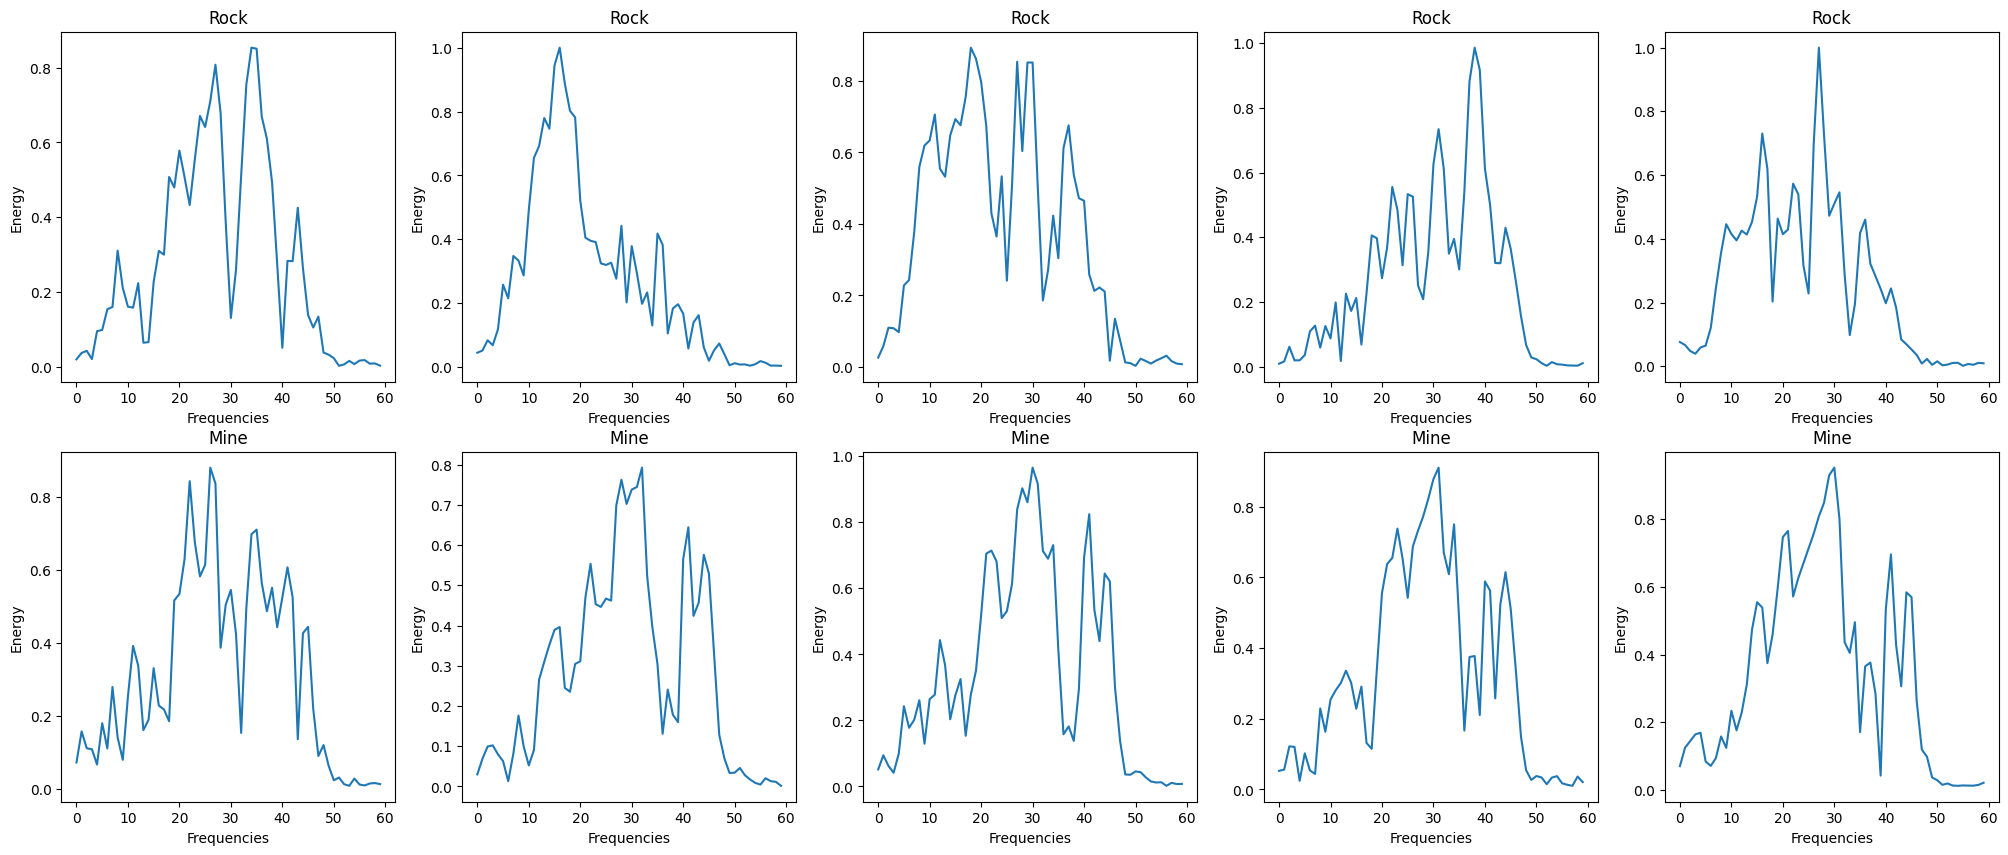

In [ ]:
# import modules
from matplotlib import pyplot as plt
import numpy as np

# plot 10 data points from the data set

# create a figure with two rows of five panels
fig,ax = plt.subplots(2,5,figsize=(25, 10))

# the flatten function allows us to reference the panels with a single index
ax = ax.flatten()

# plot five data points labelled as "rocks"
for i in range(5):

  # the first 97 data points are all rocks. We plot the first five sets of energies over a range of 60 frequencies. [:-1] removes the label.
  ax[i].plot(range(60),list(data.iloc[i])[:-1])

  # set plot labels and title
  ax[i].set_title('Rock')
  ax[i].set_xlabel("Frequencies")
  ax[i].set_ylabel("Energy")

#plot five data points labelled as mines
for i in range(5,10):

  # the last 111 data points are all mines. We plot five of these from the end of the data set
  ax[i].plot(range(60),list(data.iloc[150-i])[:-1])

  # set plot labels and title
  ax[i].set_title('Mine')
  ax[i].set_xlabel("Frequencies")
  ax[i].set_ylabel("Energy")

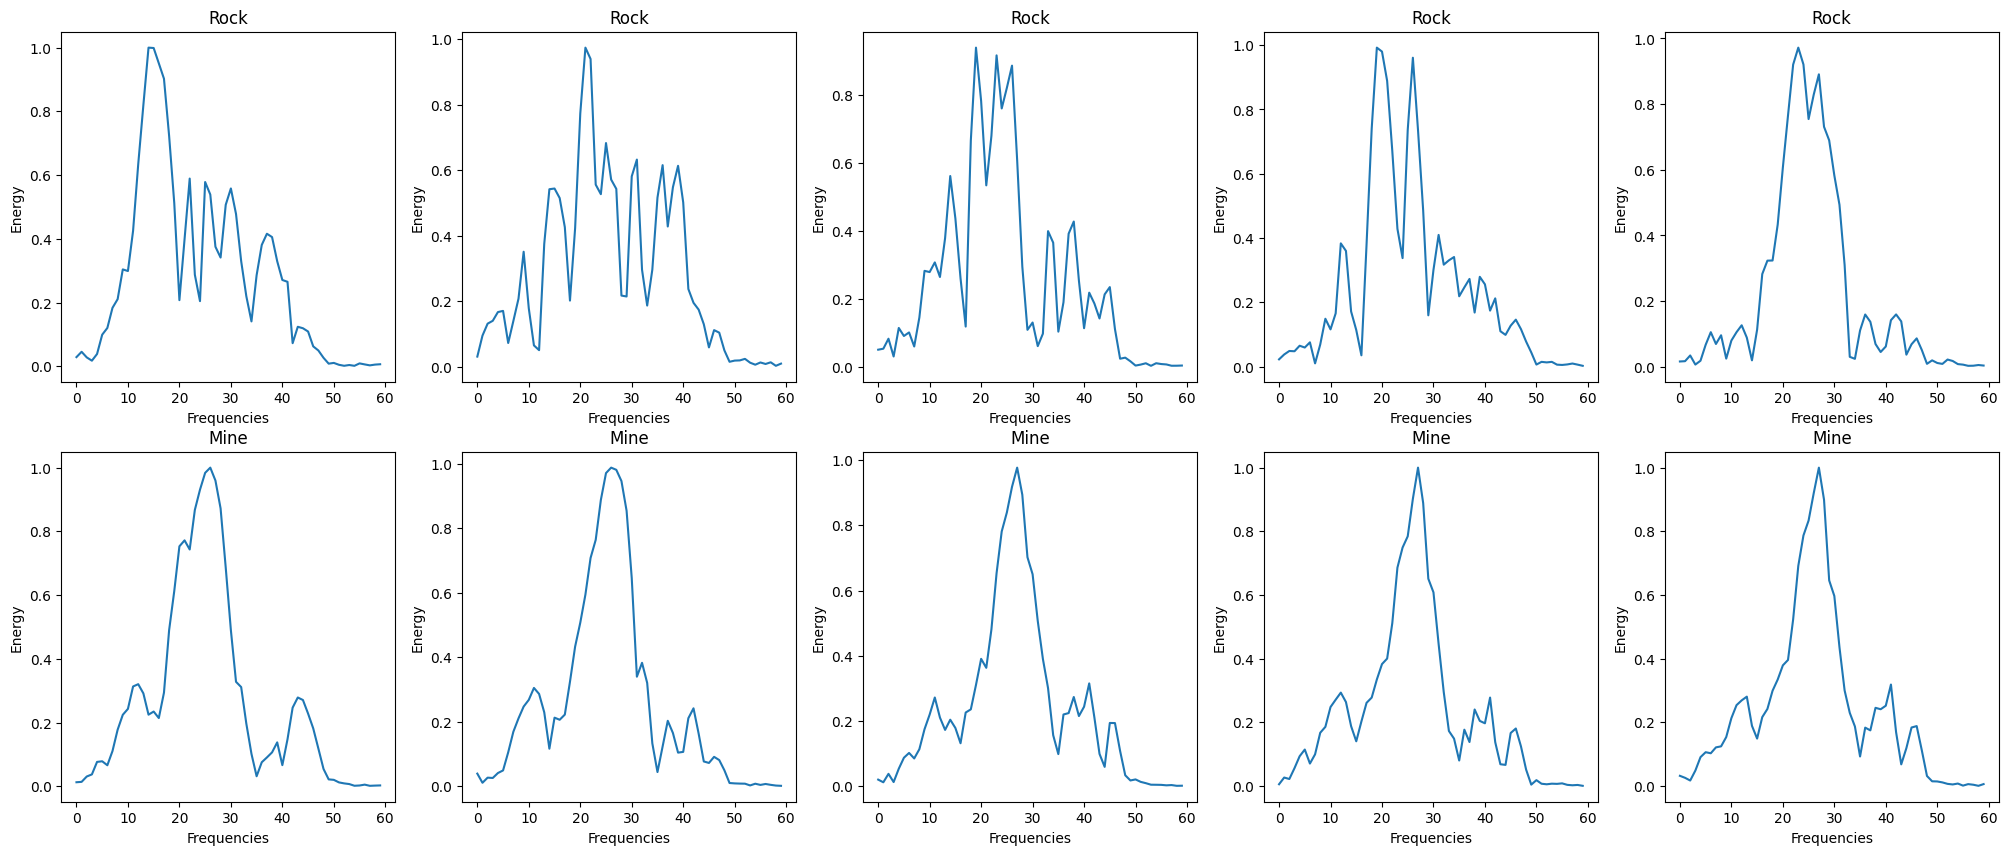

In [ ]:
# plot 10 more data points from the data set, using different mine data points

# create a figure with two rows of five panels
fig,ax = plt.subplots(2,5,figsize=(25, 10))

# the flatten function allows us to reference the panels with a single index
ax = ax.flatten()

# plot five data points labelled as "rocks"
for i in range(5):

  # the first 97 data points are all rocks. We plot the next five sets of energies over a range of 60 frequencies. [:-1] removes the label.
  ax[i].plot(range(60),list(data.iloc[i+5])[:-1])

  # set plot labels and title
  ax[i].set_title('Rock')
  ax[i].set_xlabel("Frequencies")
  ax[i].set_ylabel("Energy")

#plot another five data points labelled as mines
for i in range(5,10):

  # the last 111 data points are all mines. We plot five of these from the end of the data set
  ax[i].plot(range(60),list(data.iloc[200-i])[:-1])

  # set plot labels and title
  ax[i].set_title('Mine')
  ax[i].set_xlabel("Frequencies")
  ax[i].set_ylabel("Energy")

#Data Preparation

In [ ]:
# import the train_test_split function to create separate training and testing data sets
from sklearn.model_selection import train_test_split

# create a list with the initial labels from the data set
init_labels = list(data['Label'])

# create an empty list that will hold the new (numerical) labels
labels = []

# loop through the data set to fill the new label list
for i in range(len(init_labels)):

  # label a data point with a zero if it's initial label is "R" for "rock", or with a one if it's labelled "M" for "mine"
  if init_labels[i] == 'R':
    labels.append(0)
  else:
    labels.append(1)

# separate the frequencie series input data from the labels
freqs = data.iloc[:,:-1]

#split the data into training and testing sets, using a 60% training and 40% testing split
X_train, X_test, y_train, y_test = train_test_split(freqs, labels, test_size = 0.4, random_state = 6)

#PCA Analysis

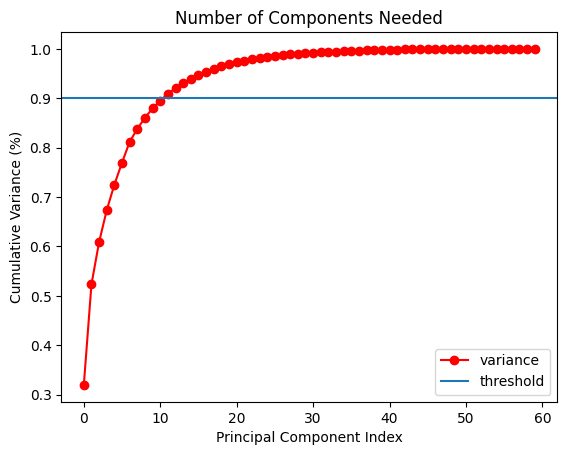

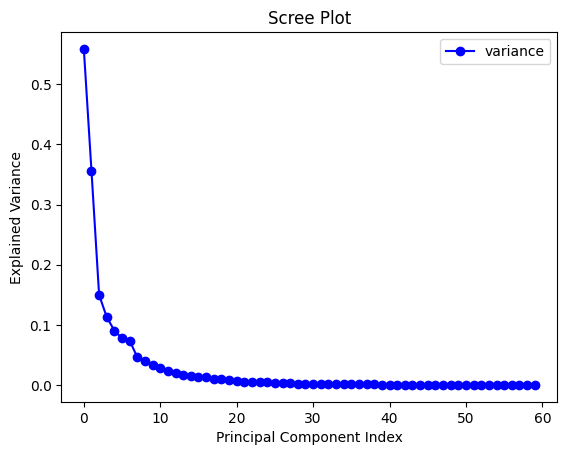

Text(0, 0.5, 'Second Principal Component')

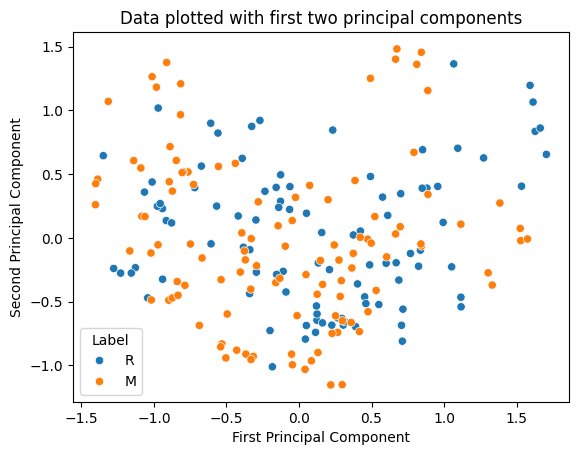

In [ ]:
# import modules
from sklearn.decomposition import PCA
import seaborn as sns

# initialize a PCA object
pca = PCA()

# fit the PCA and use it to create principal components from the frequency data
prin_comp = pca.fit_transform(freqs)

# create a list of principal component indicies for plotting purposes
components = np.arange(0, 60, step=1)

# compute the cumulative sum of the variances from each principal component
variance = np.cumsum(pca.explained_variance_ratio_)

# set a threshold that determines how much variance we want to be accounted for
y_threshold = 0.9

# plot variance vs number of principal components
plt.plot(components, variance, color = 'r', label = 'variance', marker="o")

# plot variance threshold to see where the two intersect (how many components are necessary)
plt.axhline(y=y_threshold, label = 'threshold')

# set plot labels, title, and legend
plt.xlabel('Principal Component Index')
plt.ylabel('Cumulative Variance (%)')
plt.title('Number of Components Needed')
plt.legend()
plt.show()

# create a scree plot using the explained variance from the pca
plt.plot(pca.explained_variance_, color='blue', label = 'variance', marker = 'o')

# set plot title, legend, and labels
plt.legend()
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component Index')
plt.title('Scree Plot')
plt.show()

# plot data using the first two principal components
sns.scatterplot(data=data, x=prin_comp[:,0], y=prin_comp[:,1],hue="Label")
plt.title('Data plotted with first two principal components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

#SVM Testing

Accuracy: 79.76190476190477


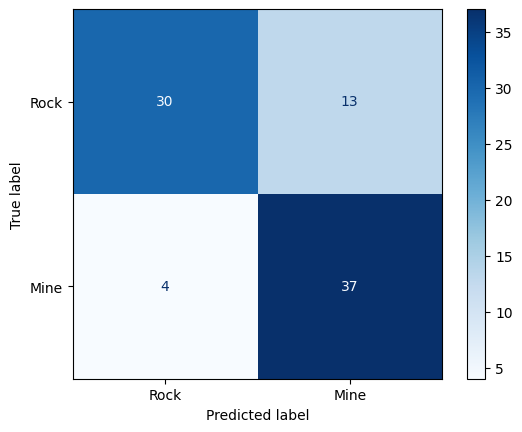

In [ ]:
# import modules
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# make a list of the full names of our two classes for labelling purposes
classes = ['Rock', 'Mine']

# create an SVM classifier with RBF kernel and gamma = 2
clf = SVC(kernel='rbf', gamma=2)

# rrain the classifier on the training data
clf.fit(X_train, y_train)

# predict the labels of the testing data
y_pred = clf.predict(X_test)

# calculate the accuracy of the classifier
acc = accuracy_score(y_test, y_pred)

# create confustion matrix displaying the results
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap = plt.cm.Blues, display_labels=classes, normalize = None)

# print the overall accuracy of the SVM model as a percentage
print("Accuracy:", acc*100)

Accuracy: 80.95238095238095


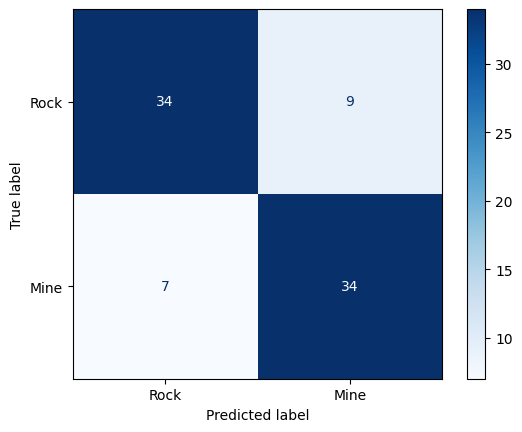

In [ ]:
# create an SVM classifier degree three polynomial kernel and gamma = 2
clf = SVC(kernel='poly', degree = 3, coef0 = 0, gamma = 2, random_state = 100)

# rrain the classifier on the training data
clf.fit(X_train, y_train)

# predict the labels of the testing data
y_pred = clf.predict(X_test)

# calculate the accuracy of the classifier
acc = accuracy_score(y_test, y_pred)

# create confustion matrix displaying the results
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap = plt.cm.Blues, display_labels=classes, normalize = None)

# print the overall accuracy of the SVM model as a percentage
print("Accuracy:", acc*100)

#Neural Network Testing

##Split data into training and testing

In [ ]:
# import modules
from sklearn.model_selection import train_test_split
import torch

# re-load data using pandas
data = pd.read_csv('connectionist-bench-sonar-mines-vs-rocks/sonar.all-data.csv')

# replace 'R' labels with zeros and 'M' labels with ones
init_labels = list(data['Label'])
labels = []
for i in range(len(init_labels)):
  if init_labels[i] == 'R':
    labels.append(0)
  else:
    labels.append(1)
freqs = data.iloc[:,:-1]

# split data into training and testing sets with a 70% to 30% split
X_train, X_test, y_train, y_test = train_test_split(freqs, labels, test_size = 0.3, random_state = 42)

# initialize empty lists that will hold reformatted data
train = []
test = []

# re-package data as tuples with tensor data type for use with pytorch DataLoaders
for i in range(len(X_train)):
  train.append((torch.tensor(list(X_train.iloc[i]), dtype=torch.float32), y_train[i]))

for i in range(len(X_test)):
  test.append((torch.tensor(list(X_test.iloc[i]), dtype=torch.float32), y_test[i]))

##Create the Neural Network

###First Model

In [ ]:
# import neural network functions
from torch import nn

# define first neural network class
class NeuralNet(nn.Module):

  # define components of network architecture
  def __init__(self):
    super(NeuralNet, self).__init__()
    self.fc1 = nn.Linear(60, 24)                      # fully connected hideen layer
    self.fc2 = nn.Linear(24, 12)                      # fully connected hidden layer
    self.fc3 = nn.Linear(12, 2)                       # fully connected output layer
    self.dropout = nn.Dropout(p=0.1)                  # dropout layer with p = 0.1
    self.hidden_activation_function = nn.ReLU()       # ReLU activation function

  # define the forward pass structure of the network
  def forward(self, x):

    # use the view function to ensure that the data enters the newrok with the proper shape
    x = x.view(-1, 60)

    # pass through the first hidden layer followed by activation and dropout
    x = self.hidden_activation_function(self.fc1(x))
    x = self.dropout(x)

    # pass through the second hidden layer followed by activation and dropout
    x = self.hidden_activation_function(self.fc2(x))
    x = self.dropout(x)

    # pass through output layer
    x = self.fc3(x)

    # use softmax function to get probabilities
    x = nn.functional.log_softmax(x, dim=1)

    return x

In [ ]:
# import DataLoader
from torch.utils.data import DataLoader

# initialize a NeuralNet object, cost function, and optimizer
model_1 = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

# create DataLoaders for training and testing sets
train_loader = DataLoader(train, batch_size=8, shuffle=True)
test_loader = DataLoader(test, batch_size=8, shuffle=False)

Epoch 1/60: Training Accuracy=53.10%
Epoch 1/60: Testing Accuracy=55.56%

Epoch 2/60: Training Accuracy=52.41%
Epoch 2/60: Testing Accuracy=57.14%

Epoch 3/60: Training Accuracy=53.10%
Epoch 3/60: Testing Accuracy=55.56%

Epoch 4/60: Training Accuracy=52.41%
Epoch 4/60: Testing Accuracy=55.56%

Epoch 5/60: Training Accuracy=53.79%
Epoch 5/60: Testing Accuracy=58.73%

Epoch 6/60: Training Accuracy=59.31%
Epoch 6/60: Testing Accuracy=63.49%

Epoch 7/60: Training Accuracy=60.69%
Epoch 7/60: Testing Accuracy=66.67%

Epoch 8/60: Training Accuracy=60.00%
Epoch 8/60: Testing Accuracy=63.49%

Epoch 9/60: Training Accuracy=60.00%
Epoch 9/60: Testing Accuracy=66.67%

Epoch 10/60: Training Accuracy=66.21%
Epoch 10/60: Testing Accuracy=68.25%

Epoch 11/60: Training Accuracy=67.59%
Epoch 11/60: Testing Accuracy=71.43%

Epoch 12/60: Training Accuracy=72.41%
Epoch 12/60: Testing Accuracy=77.78%

Epoch 13/60: Training Accuracy=75.17%
Epoch 13/60: Testing Accuracy=77.78%

Epoch 14/60: Training Accuracy

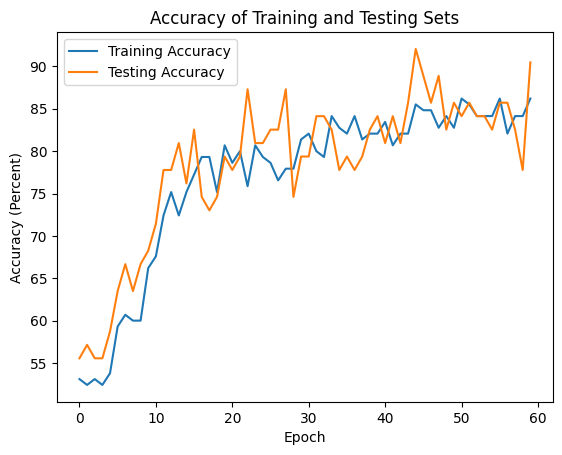

In [ ]:
# create lists to store accuracies as epochs pass
train_acc = []
test_acc = []

# set a number of epochs for which to train the model
noEpochs = 60

# iterate over the number of epochs and compute training and testing accuracy for each
for epoch in range(noEpochs):

  # train the model
  for freqs, labels in train_loader:
    # perform forward pass
    output = model_1(freqs)
    # compute the loss
    loss = criterion(output, labels)
    # perform backward pass and update network parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # compute the accuracy on the train dataset
  correct_train = 0
  total_train = 0
  for freqs, labels in train_loader:
    # perform forward pass
    output = model_1(freqs)
    # get the predicted classes
    _, predicted = torch.max(output.data, 1)
    # update the accuracy
    total_train += labels.size(0)
    correct_train += (predicted == labels).sum()

  # print the epoch and accuracy
  print(f'Epoch {epoch+1}/' + str(noEpochs) + f': Training Accuracy={100 * correct_train / total_train:.2f}%')

  # add the accuracy to the cumulative training list
  train_acc.append(100 * correct_train / total_train)

  # compute the accuracy on the test dataset
  correct_test = 0
  total_test = 0
  for freqs, labels in test_loader:
    # peform forward pass
    output = model_1(freqs)
    # get the predicted classes
    _, predicted = torch.max(output.data, 1)
    # update the accuracy
    total_test += labels.size(0)
    correct_test += (predicted == labels).sum()

  # print the epoch and accuracy
  print(f'Epoch {epoch+1}/' + str(noEpochs) + f': Testing Accuracy={100 * correct_test / total_test :.2f}%\n')

  # add the accuracy to the cumulative testing list
  test_acc.append(100 * correct_test / total_test)

# plot the training and testing accuracies against the number of epochs
plt.plot(np.arange(noEpochs), train_acc)
plt.plot(np.arange(noEpochs), test_acc)

# set plot labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Accuracy (Percent)')
plt.title('Accuracy of Training and Testing Sets')
plt.legend(["Training Accuracy", "Testing Accuracy"])

#Second Model: 1D Convolutional Neural Network

In [ ]:
# define second network class, this time with convolutional layers
class NeuralNet_2(nn.Module):

  # define components of network architecture
  def __init__(self):
    super(NeuralNet_2, self).__init__()

    # create two convolutional layers with ReLU and maxpooling layers after each
    # the first in_channels is 1 to accept our "grayscale" data points
    self.convolutaional_neural_network_layers = nn.Sequential(
      nn.Conv1d(in_channels = 1, out_channels = 8, kernel_size = 3, padding = 1, stride = 1),
      nn.ReLU(),
      nn.MaxPool1d(kernel_size = 2),
      nn.Conv1d(in_channels = 8, out_channels = 16, kernel_size = 3, padding = 1, stride = 1),
      nn.ReLU(),
      nn.MaxPool1d(kernel_size = 2))

    # create two linear layers with ReLU after each
    # the initial number of input features is 15*16 based on the output of the convolutional layers
    # the dropout method randomly disengages 15% of the neurons after each layer to combat overfitting
    self.linear_layers = nn.Sequential(
      nn.Linear(in_features = 15*16, out_features = 24),
      nn.ReLU(),
      nn.Dropout(p = 0.15),
      nn.Linear(in_features = 24, out_features = 12),
      nn.ReLU(),
      nn.Dropout(p = 0.15),
      nn.Linear(in_features = 12, out_features = 2))

  # define the forward pass process
  def forward(self, x):

    # our data does not include a component for the number of channels, so we add one manually
    x = x[:,None,:]

    # pass x through the convolutional layers
    x = self.convolutaional_neural_network_layers(x)

    # flatten x so that the linear layers can receive it
    x = x.view(x.size(0), -1)

    # pass x through the linear layers
    x = self.linear_layers(x)

    # compute probability that each class is predicted by the model
    x = nn.functional.log_softmax(x, dim=1)

    return x

In [ ]:
# import DataLoader
from torch.utils.data import DataLoader

# initialize convolutional model, cost function, and optimizer
model_2 = NeuralNet_2()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

# create DataLoaders for training and testing data
train_loader = DataLoader(train, batch_size=10, shuffle=True)
test_loader = DataLoader(test, batch_size=10, shuffle=False)

Epoch 1/65: Training Accuracy=47.59%
Epoch 1/65: Testing Accuracy=44.44%

Epoch 2/65: Training Accuracy=47.59%
Epoch 2/65: Testing Accuracy=44.44%

Epoch 3/65: Training Accuracy=47.59%
Epoch 3/65: Testing Accuracy=44.44%

Epoch 4/65: Training Accuracy=51.72%
Epoch 4/65: Testing Accuracy=44.44%

Epoch 5/65: Training Accuracy=53.79%
Epoch 5/65: Testing Accuracy=47.62%

Epoch 6/65: Training Accuracy=57.24%
Epoch 6/65: Testing Accuracy=52.38%

Epoch 7/65: Training Accuracy=52.41%
Epoch 7/65: Testing Accuracy=57.14%

Epoch 8/65: Training Accuracy=55.17%
Epoch 8/65: Testing Accuracy=49.21%

Epoch 9/65: Training Accuracy=54.48%
Epoch 9/65: Testing Accuracy=50.79%

Epoch 10/65: Training Accuracy=53.10%
Epoch 10/65: Testing Accuracy=46.03%

Epoch 11/65: Training Accuracy=51.72%
Epoch 11/65: Testing Accuracy=52.38%

Epoch 12/65: Training Accuracy=60.69%
Epoch 12/65: Testing Accuracy=71.43%

Epoch 13/65: Training Accuracy=62.07%
Epoch 13/65: Testing Accuracy=73.02%

Epoch 14/65: Training Accuracy

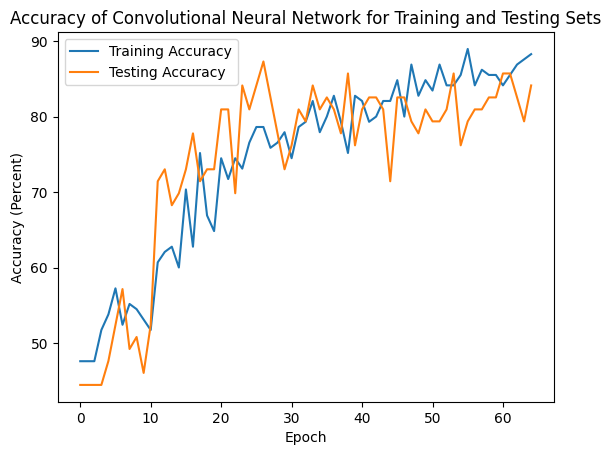

In [ ]:
# create lists to store accuracies as epochs pass
train_acc = []
test_acc = []

# set a number of epochs for which to train the model
noEpochs = 65

# iterate over the number of epochs and compute training and testing accuracy for each
for epoch in range(noEpochs):

  # train the model
  for freqs, labels in train_loader:
    # perform forward pass
    output = model_2(freqs)
    # compute the loss
    loss = criterion(output, labels)
    # perform backward pass and update network parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # compute the accuracy on the train dataset
  correct_train = 0
  total_train = 0
  for freqs, labels in train_loader:
    # perform forward pass
    output = model_2(freqs)
    # get the predicted classes
    _, predicted = torch.max(output.data, 1)
    # update the accuracy
    total_train += labels.size(0)
    correct_train += (predicted == labels).sum()

  # print the epoch and accuracy
  print(f'Epoch {epoch+1}/' + str(noEpochs) + f': Training Accuracy={100 * correct_train / total_train:.2f}%')

  # add the accuracy to the cumulative training list
  train_acc.append(100 * correct_train / total_train)

  # compute the accuracy on the test dataset
  correct_test = 0
  total_test = 0
  for freqs, labels in test_loader:
    # perform forward pass
    output = model_2(freqs)
    # get the predicted classes
    _, predicted = torch.max(output.data, 1)
    # update the accuracy
    total_test += labels.size(0)
    correct_test += (predicted == labels).sum()

  # print the epoch and accuracy
  print(f'Epoch {epoch+1}/' + str(noEpochs) + f': Testing Accuracy={100 * correct_test / total_test :.2f}%\n')

  # add the accuracy to the cumulative testing list
  test_acc.append(100 * correct_test / total_test)

# plot the training and testing accuracies against the number of epochs
plt.plot(np.arange(noEpochs), train_acc)
plt.plot(np.arange(noEpochs), test_acc)

# set plot title, labels, and legend
plt.xlabel('Epoch')
plt.ylabel('Accuracy (Percent)')
plt.title('Accuracy of Convolutional Neural Network for Training and Testing Sets')
plt.legend(["Training Accuracy", "Testing Accuracy"])

##Results Visualization: Model 1

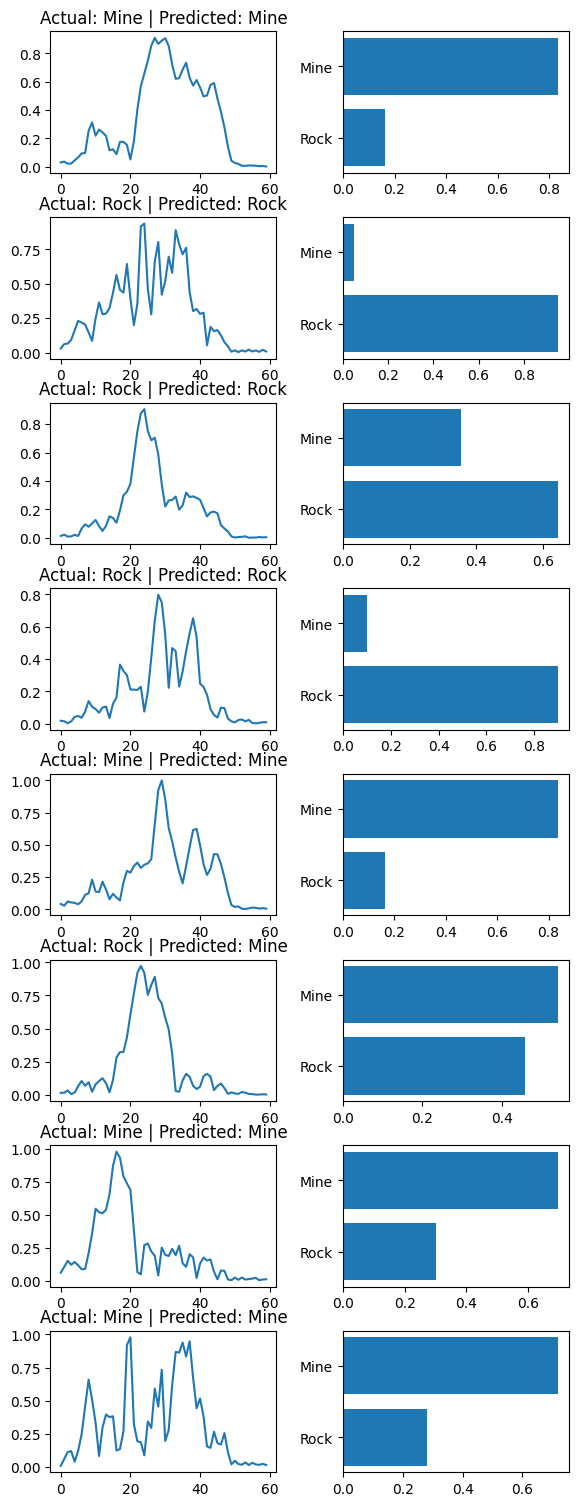

In [ ]:
# import modules
from matplotlib import pyplot as plt
import numpy as np

# creat a list with the full class names for labelling purposes
classes = ["Rock", "Mine"]

# create a figure with 8 rows of 2 panels
fig, ax = plt.subplots(8,2,figsize=(6,15))
fig.tight_layout()

# get a batch from the testing DataLoader
batch = next(iter(test_loader))

# iterate through the batch
for i in range(8):

  # separate the frequencies from their label
  freq = batch[0][i]

  # compute log probabilities according to the first neural network model
  log_prob = model_1(freq)

  # create binary prediction based on which label (0 or 1) has the higher probability
  _, predicted = torch.max(log_prob.data, 1)

  # take exponential to calculate probability
  prob = torch.exp(log_prob).detach().cpu().numpy().squeeze()

  # plot data point in the first column
  ax[i][0].plot(range(60),batch[0][i])

  # plot probability bar graph in the second column
  ax[i][1].barh(["Rock","Mine"],prob)

  # set plot labels and title
  title = 'Actual: ' + classes[batch[1][i]] + " | Predicted: " + classes[predicted[0]]
  ax[i][0].set_title(title)

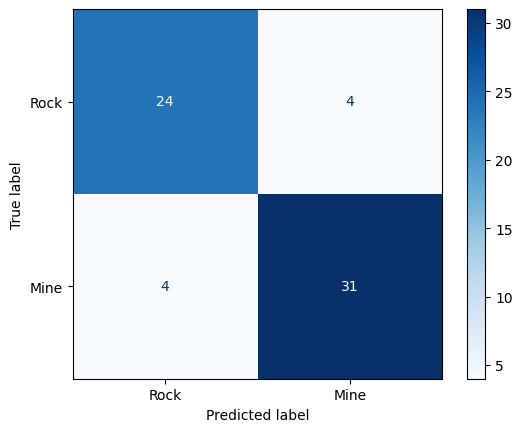

In [ ]:
# import confustion matrix functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# create empty lists to store true and predicted numerical labels (0 or 1)
true_vals = []
pred_vals = []

# iterate through test DataLoader
for freqs, labels in test_loader:

  # use model to compute log probabilities
  output = model_1(freqs)

  # transform probabilities into binary result
  _, predicted = torch.max(output.data, 1)

  # add true labels and predicted labels to their respective lists
  true_vals.extend(labels)
  pred_vals.extend(predicted)

# plot the confusion matrix for the first model
confMatrix = confusion_matrix(y_true = true_vals, y_pred = pred_vals)
disp = ConfusionMatrixDisplay(confMatrix, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

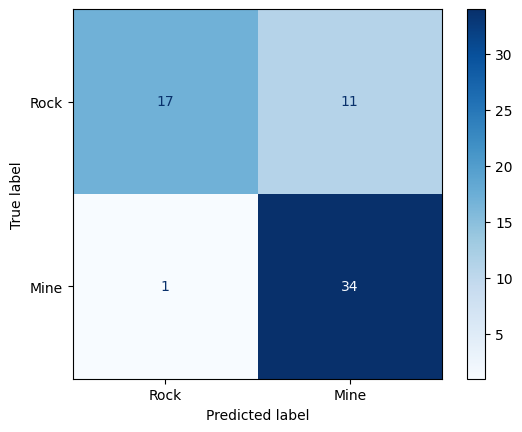

In [ ]:
# re-import the confusion matrix functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# create empty lists to store labels
true_vals = []
pred_vals = []

# iterate through testing DataLoader
for freqs, labels in test_loader:

  # iterate through each set of input frequencies within each batch of data
  for freq in freqs:

    # compute individual log probabilities
    log_prob = model_1(freq)

    # compute actual probability by exponentiating
    prob = torch.exp(log_prob).detach().cpu().numpy().squeeze()

    # if the probability that the object is a mine is greater than 15%, label it as a mine. Otherwise, label it a rock
    if prob[1] >= 0.15:
      pred_vals.append(1)
    else:
      pred_vals.append(0)

  # add true labels to list
  true_vals.extend(labels)

# plot the confusion matrix with false negatives discouraged
confMatrix = confusion_matrix(y_true= true_vals, y_pred = pred_vals)
disp = ConfusionMatrixDisplay(confMatrix, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#Results Visualization: Model 3

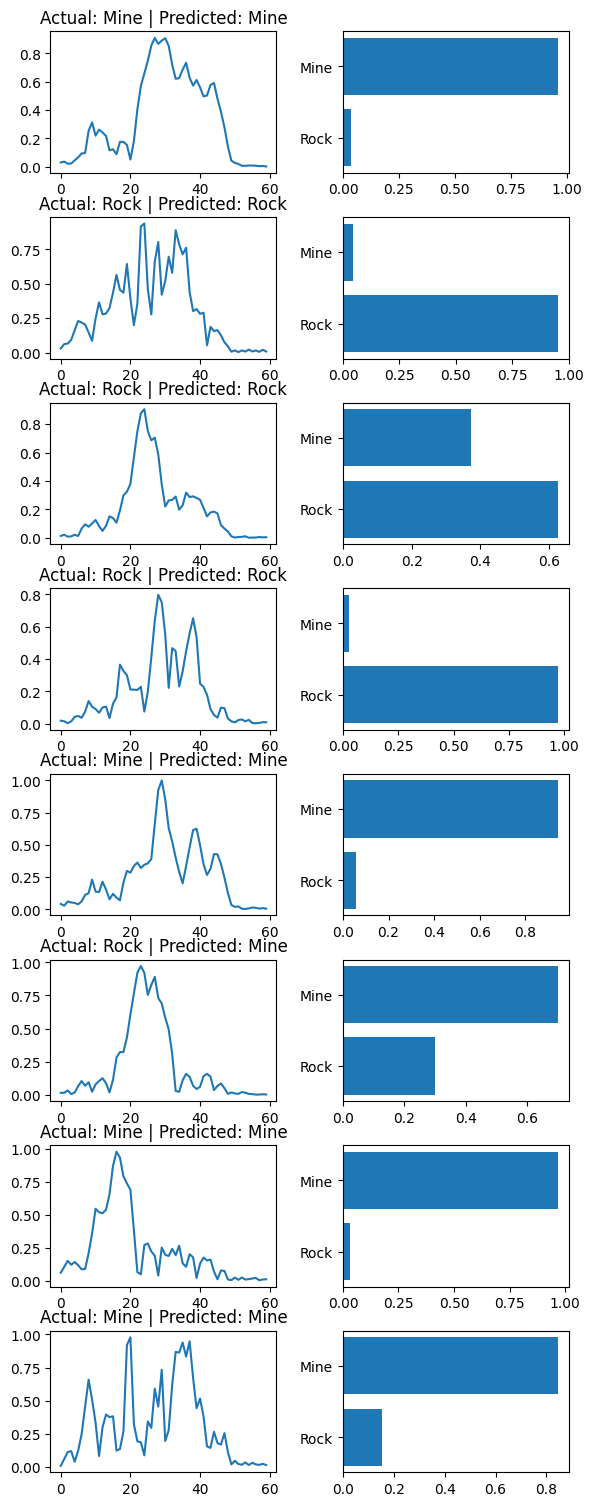

In [ ]:
# import modules
from matplotlib import pyplot as plt
import numpy as np

# create list of full class names for labelling purposes
classes = ["Rock", "Mine"]

# create 8x2 figure as before
fig, ax = plt.subplots(8,2,figsize=(6,15))
fig.tight_layout()

# get a batch of test data
batch = next(iter(test_loader))

#iterate over the data points in the batch
for i in range(8):

  # separate the lists of frequencies
  freq = batch[0]

  # compute all the log probabilities simultaneously using convolutional model
  log_prob = model_2(freq)

  # generate binary results
  _, predicted = torch.max(log_prob.data, 1)

  # take exponential to calculate probability
  prob = torch.exp(log_prob).detach().cpu().numpy().squeeze()

  # plot data points in the first column
  ax[i][0].plot(range(60),batch[0][i])

  # plot probability bar graphs in the second column
  ax[i][1].barh(["Rock","Mine"],prob[i])

  # set plot title and labels
  title = 'Actual: ' + classes[batch[1][i]] + " | Predicted: " + classes[predicted[i]]
  ax[i][0].set_title(title)

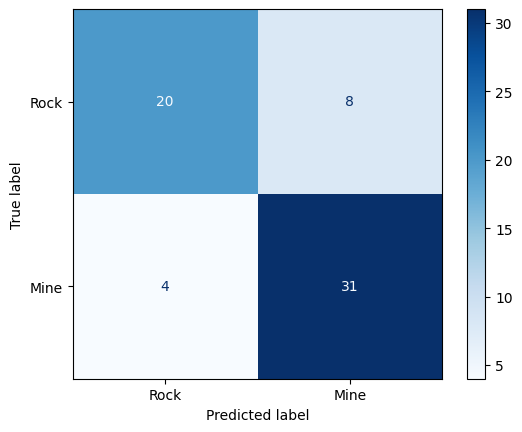

In [ ]:
# import confusion matrix functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# set empty lists for labels as before
true_vals = []
pred_vals = []

# iterate through test DataLoader
for freqs, labels in test_loader:

  # compute all log probabilities simultaneously
  output = model_2(freqs)

  # get binary results
  _, predicted = torch.max(output.data, 1)

  # extend lists of labels as before
  true_vals.extend(labels)
  pred_vals.extend(predicted)

# plot confusion matrix
confMatrix = confusion_matrix(y_true = true_vals, y_pred = pred_vals)
disp = ConfusionMatrixDisplay(confMatrix, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

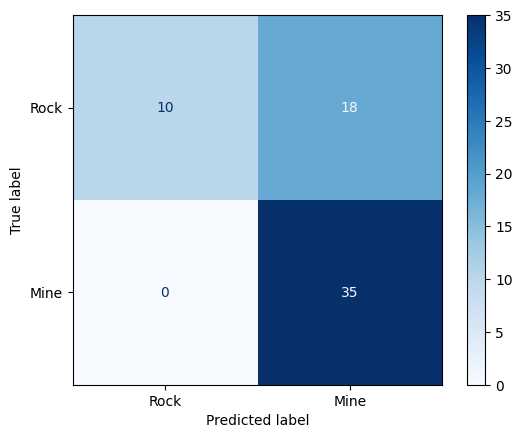

In [ ]:
# re-import confusion matrix functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# make label lists
true_vals = []
pred_vals = []

# iterate through testing DataLoader
for freqs, labels in test_loader:

  # compute log probabilities
  log_prob = model_2(freqs)

  # iterate over each of the computed pairs of log probabilities
  for l_prob in log_prob:

    # for each data point, compute the actual probability by exponentiating
    prob = torch.exp(l_prob).detach().cpu().numpy().squeeze()

    # if an object has a 6% or greater chance of being a mine, label it a mine. Otherwise, label it a rock
    if prob[1] >= 0.06:
      pred_vals.append(1)
    else:
      pred_vals.append(0)

  # extend list of true labels
  true_vals.extend(labels)

# plot confusion matrix
confMatrix = confusion_matrix(y_true= true_vals, y_pred = pred_vals)
disp = ConfusionMatrixDisplay(confMatrix, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()